# Global definitions

Load Pylab, define CPTs...

In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [21]:
# Define the CPTs and other useful functions here (e.g. samling from a distribution) here...
POB = array([[[0.01, 0.7], 
               [0.99, 0.3] ],
            [[0.8, 0.999],
            [0.2, 0.001]]])
O_PB = POB.transpose(1, 0, 2)
#print BO[0,0,1]
#print O_PB[0,0,1]

T_P = array([[0.8, 0.1],
             [0.2, 0.9]])
#print T_P[1,0]
P_L = T_P.copy()  #copy array and not reference # TODO
#print P_L[0,1]
L = array([0.9, 0.1])
B = array([0.99, 0.01])
#print random.sample(10)
O_PB2 = O_PB.cumsum()
#print O_PB2
#print O_PB2.searchsorted(random.sample(10))

#PL = P_L * L
#print PL
#l = L.cumsum().searchsorted(1.1)
#print l
#T = empty([1, 2])
#O = empty([1, 2])
#P = empty([1, 2])

#print P
###########new empty array # TODO
#P[0] =1
#P[1] = 2
#print P
#print L
#print T
#print O
#P[0] = L[0] * P_L[0, 0] + L[1] * P_L[0, 1]
#P[1] = L[0] * P_L[1, 0] + L[1] * P_L[1, 1]
#P = (P_L * L).sum(1)
#print P
#print 

#T = (T_P * P).sum(1)
#print T


#O[0,0] = P[0] * B[0] * O_PB[0, 0, 0] + P[1] * B[0] * O_PB[0, 1, 0] + P[0] * B[1] * O_PB[0, 0, 1] + P[1] * B[1] * O_PB[0, 1, 1]
#O[0,1] = P[0] * B[0] * O_PB[1, 0, 0] + P[1] * B[0] * O_PB[1, 1, 0] + P[0] * B[1] * O_PB[1, 0, 1] + P[1] * B[1] * O_PB[1, 1, 1]

#print O

# 1) Approximate Inference Algorithms

Approximate $P(E\mid M, S)$ using various techniques.

## A) Rejection Sampling

In [22]:
def approx_rs(t, o, n):
    """ 
    Approximates P(L | T, O) using rejection sampling
    :param t: given value for T
    :param o: given value for O
    :param n: number of samples to use
    :returns: Numpy array containing the approximated distribution
    """
    # TODO: implement this function
    
    counter = 0.0
    
    for x in range(n):
        #print x
        tx = random.sample(1)
        ox = random.sample(1)
        tra = T.cumsum().searchsorted(tx)[0]  #position, not value
        ora = O.cumsum().searchsorted(ox)[0] #position, not value
        
        if (tra == t and ora == o) :      
            #print 'test'
            lx = random.sample(1)
            bx = random.sample(1)
            px = random.sample(1)
            lra = L.cumsum().searchsorted(lx)[0]  #position, not value
               # P[0] = L[l] * P_L[0, l]
            # P[1] = L[l] * P_L[1, l]
            bra = B.cumsum().searchsorted(bx)[0]  #position, not value
            pra = P.cumsum().searchsorted(px)[0]  #position, not value
            #print pra
            #T[0] = T[p] * T_P[0, p]
            #T[1] = T[p] * T_P[1, p]
            l_to = L[lra] * P_L[pra, lra] * B[bra] * T_P[tra, pra] * O_PB[ora, pra, bra] #value, not position
            #print l_to
            lcalc = L.cumsum().searchsorted(l_to)
            #print lcalc
            if lcalc == 0 :
                counter += 1
    
    
    l0_TO = counter / n
    
    #print array([l0_TO, 1 - l0_TO])
    return array([l0_TO, 1 - l0_TO])

## B) Likelihood Weighting

In [23]:
def approx_lw(t, o, n):
    """
    Empty implementation of Aiv)
    Approximates P(L | T, O) using likelihood weighting
    :param t: given value for T
    :param o: given value for O
    :param n: number of samples to use
    :returns: Numpy array containing the approximated distribution
    """
    # TODO: implement this function
    l0 = 0.0
    l1 = 0.0
    
    for x in range(n):
        bx = random.sample(1)
        px = random.sample(1)  
        bra = B.cumsum().searchsorted(bx)[0]  #position, not value
        pra = P.cumsum().searchsorted(px)[0]  #position, not value
        l0 += P_L[pra, 0] * T_P[t, pra] * O_PB[o, pra, bra]
        l1 += P_L[pra, 1] * T_P[t, pra] * O_PB[o, pra, bra]
    
    ltot = l0 + l1
    
    #print array([l0/ltot, l1/ltot])
    return array([l0/ltot, l1/ltot])

## C) Gibbs Sampling

In [24]:
def approx_gibbs(t, o, n):
    """ 
    Approximates P(L | T, O) using Gibbs sampling
    :param t: given value for T
    :param o: given value for O
    :param n: number of samples to use
    :returns: Numpy array containing the approximated distribution
    """
    # TODO: implement this function
    lx = random.sample(1)
    bx = random.sample(1)
    px = random.sample(1)
    lra = L.cumsum().searchsorted(lx)[0]  #position, not value
    bra = B.cumsum().searchsorted(bx)[0]  #position, not value
    pra = P.cumsum().searchsorted(px)[0]  #position, not value
#    x = empty([n, 5])
#    x[0] = array([lra, pra, bra, t, o])
    counter = 0.0
    
    for y in range(1, n):
        # 1
        l0_pbto = L[0] * P_L[pra, 0]
        l1_pbto = L[1] * P_L[pra, 1]
        l_pbto_sum = l0_pbto + l1_pbto
        L_pbto = array([l0_pbto / l_pbto_sum, l1_pbto / l_pbto_sum])
        lx2 = random.sample(1)
        lra = L_pbto.cumsum().searchsorted(lx2)[0] 

        # 2
        
        p0_lbto = P_L[0, lra] * T_P[t, 0] * O_PB[o, 0, bra]
        p1_lbto = P_L[1, lra] * T_P[t, 1] * O_PB[o, 1, bra]
        p_lbto_sum = p0_lbto + p1_lbto
        P_lbto = array([p0_lbto / p_lbto_sum, p1_lbto / p_lbto_sum])
        px2 = random.sample(1)
        pra = P_lbto.cumsum().searchsorted(px2)[0]

        # 3
        b0_lpto = B[0] * O_PB[o, pra, 0]
        b1_lpto = B[1] * O_PB[o, pra, 1]
        b_lpto_sum = b0_lpto + b1_lpto
        B_lpto = array([b0_lpto / b_lpto_sum, b1_lpto / b_lpto_sum])
        bx2 = random.sample(1)
        bra = B_lpto.cumsum().searchsorted(bx2)[0]
        #x[y] = array([lra, pra, bra, t, o])
        if lra == 0:
            counter += 1
            
            
    
    l0_TO = counter / n
    
    #print array([l0_TO, 1 - l0_TO])
    return array([l0_TO, 1 - l0_TO])

# 2) Comparison

## A) Exact Inference

In [25]:
def exact(t, o):
    """ 
    Computes P(L | T, O) using exact inference
    :param t: given value for T
    :param o: given value for O
    :returns: Numpy array containing the distribution
    """
    # TODO: implement this function
    
    o0_p0b0 = L[0] * P_L[0, 0] * B[0] * T_P[0, 0] * O_PB[0, 0, 0] + L[0] * P_L[0, 1] * B[0] * T_P[0, 0] * O_PB[0, 0, 0] + L[0] * P_L[0, 0] * B[0] * T_P[1, 0] * O_PB[0, 0, 0] +  L[0] * P_L[0, 1] * B[0] * T_P[1, 0] * O_PB[0, 0, 0]   
    o0_p0b1 = L[0] * P_L[0, 0] * B[1] * T_P[0, 0] * O_PB[0, 0, 1] + L[0] * P_L[0, 1] * B[1] * T_P[0, 0] * O_PB[0, 0, 1] + L[0] * P_L[0, 0] * B[1] * T_P[1, 0] * O_PB[0, 0, 1] +  L[0] * P_L[0, 1] * B[1] * T_P[1, 0] * O_PB[0, 0, 1]   
    o0_p1b0 = L[0] * P_L[1, 0] * B[0] * T_P[0, 1] * O_PB[0, 1, 0] + L[0] * P_L[1, 1] * B[0] * T_P[0, 1] * O_PB[0, 1, 0] + L[0] * P_L[1, 0] * B[0] * T_P[1, 1] * O_PB[0, 1, 0] +  L[0] * P_L[1, 1] * B[0] * T_P[1, 1] * O_PB[0, 1, 0]   
    o0_p1b1 = L[0] * P_L[1, 0] * B[1] * T_P[0, 1] * O_PB[0, 1, 1] + L[0] * P_L[1, 1] * B[1] * T_P[0, 1] * O_PB[0, 1, 1] + L[0] * P_L[1, 0] * B[1] * T_P[1, 1] * O_PB[0, 1, 1] +  L[0] * P_L[1, 1] * B[1] * T_P[1, 1] * O_PB[0, 1, 1]   
    
    o0 = o0_p0b0 + o0_p0b0 + o0_p1b0 + o0_p1b1
    
    o1_p0b0 = L[0] * P_L[0, 0] * B[0] * T_P[0, 0] * O_PB[1, 0, 0] + L[0] * P_L[0, 1] * B[0] * T_P[0, 0] * O_PB[1, 0, 0] + L[0] * P_L[0, 0] * B[0] * T_P[1, 0] * O_PB[1, 0, 0] +  L[0] * P_L[0, 1] * B[0] * T_P[1, 0] * O_PB[1, 0, 0]   
    o1_p0b1 = L[0] * P_L[0, 0] * B[1] * T_P[0, 0] * O_PB[1, 0, 1] + L[0] * P_L[0, 1] * B[1] * T_P[0, 0] * O_PB[1, 0, 1] + L[0] * P_L[0, 0] * B[1] * T_P[1, 0] * O_PB[1, 0, 1] +  L[0] * P_L[0, 1] * B[1] * T_P[1, 0] * O_PB[1, 0, 1]   
    o1_p1b0 = L[0] * P_L[1, 0] * B[0] * T_P[0, 1] * O_PB[1, 1, 0] + L[0] * P_L[1, 1] * B[0] * T_P[0, 1] * O_PB[1, 1, 0] + L[0] * P_L[1, 0] * B[0] * T_P[1, 1] * O_PB[1, 1, 0] +  L[0] * P_L[1, 1] * B[0] * T_P[1, 1] * O_PB[1, 1, 0]   
    o1_p1b1 = L[0] * P_L[1, 0] * B[1] * T_P[0, 1] * O_PB[1, 1, 1] + L[0] * P_L[1, 1] * B[1] * T_P[0, 1] * O_PB[1, 1, 1] + L[0] * P_L[1, 0] * B[1] * T_P[1, 1] * O_PB[1, 1, 1] +  L[0] * P_L[1, 1] * B[1] * T_P[1, 1] * O_PB[1, 1, 1]   

    o1 = o1_p0b0 + o1_p0b0 + o1_p1b0 + o1_p1b1
    
    osum = o0 + o1
    
    #print array([o0 / osum, o1 / osum])
    return array([o0 / osum, o1 / osum])

## B) Compute and plot estimation errors

In [26]:
def kld(p, q):
    """
    Computes the Kullback-Leibler divergence between p and q.
    :param p: true distribution
    :param q: estimated distribution
    :return: Kullback-Leibler Divergence between p and q
    """
    return (p * np.log(p / (q + 0.00000000001))).sum()  # add a small constant for numeric stability


def compute_approximation_error(approx_function, t, o, n_runs, sample_counts, **kwargs):
    """
    Computes the approximation error for a given approximation method.
    :param approx_function: function used to approximate the distribution
    :param t: given value for T
    :param o: given value for O
    :param n_runs: number of approximations
    :param sample_counts: list or array of numbers of sampels to use
    :returns: mean approximation error for each of the sample counts
    """
    mean_errors = []
    correct = exact(t, o)
    
    for num_samples in sample_counts:
        estimates = array([approx_function(t, o, n=num_samples, **kwargs) for i in range(n_runs)])
        mean_errors.append(abs(estimates - correct).mean())       
        #mean_errors.append(kld(correct, estimates))  # use this instead of the line above for KLD!
    
    return mean_errors

### Compute the estimation errors


In [ ]:
rs_errs = {}
lw_errs = {}
gb_errs = {}
n_runs = 100
sample_counts = array([10, 20, 40, 80, 160, 320, 640, 1280])

for t, o in zip([0, 0, 1, 1], [0, 1, 0, 1]):
    rs_errs[(t, o)] = compute_approximation_error(approx_rs, t, o, n_runs, sample_counts)
    lw_errs[(t, o)] = compute_approximation_error(approx_lw, t, o, n_runs, sample_counts)
    gb_errs[(t, o)] = compute_approximation_error(approx_gibbs, t, o, n_runs, sample_counts)

### Plot the estimation errors

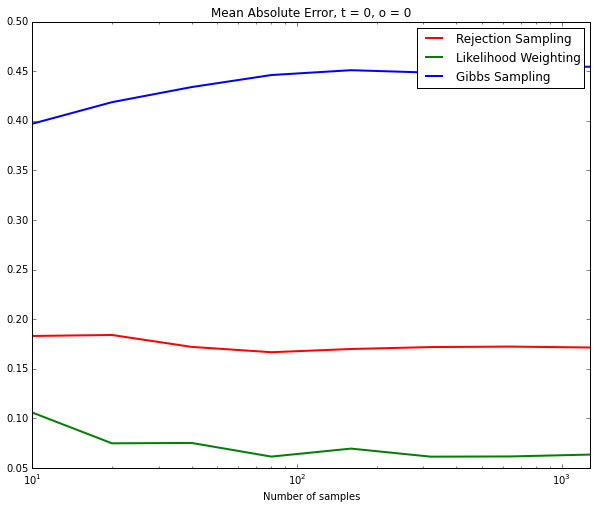

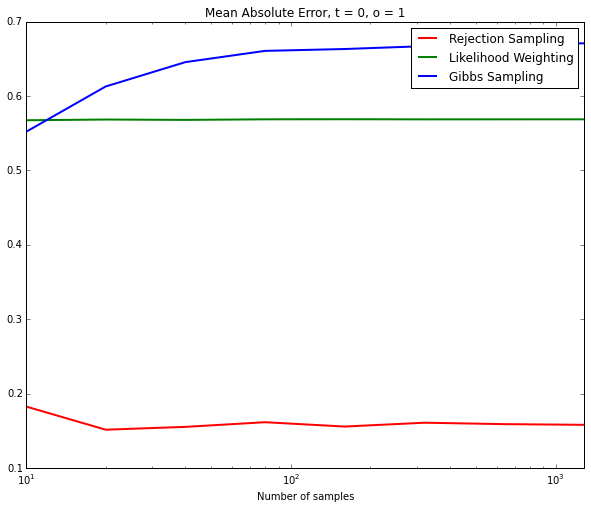

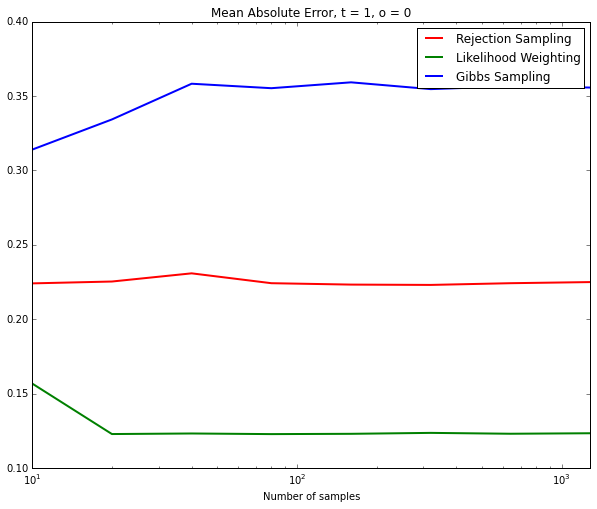

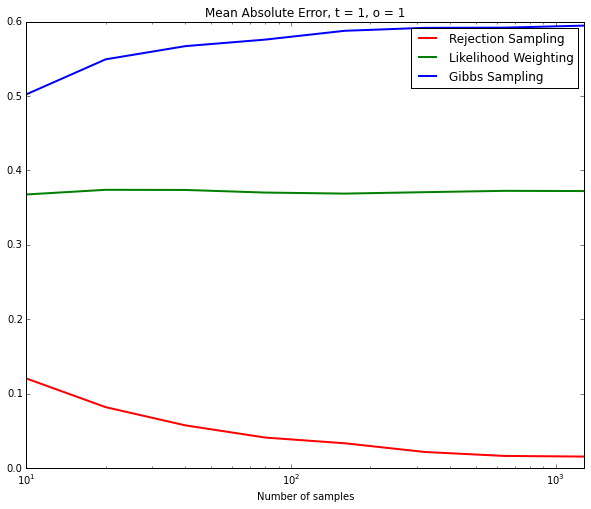

In [20]:
for t, o in zip([0, 0, 1, 1], [0, 1, 0, 1]):
    figure(figsize=(10, 8))
    title('Mean Absolute Error, t = %d, o = %d' % (t, o))

    plot(sample_counts, rs_errs[(t, o)], 'r', label='Rejection Sampling', lw=2)
    plot(sample_counts, lw_errs[(t, o)], 'g', label='Likelihood Weighting', lw=2)
    plot(sample_counts, gb_errs[(t, o)], 'b', label='Gibbs Sampling', lw=2)   
    
    legend()
    xscale('log')
    xlim(sample_counts.min(), sample_counts.max())
    xlabel('Number of samples')

In [70]:
approx_rs(0, 0, 10000)
approx_lw(0, 0, 10000)
approx_gibbs(0, 0, 10000)
exact(0,0)

[0.1351, 0.8649]
[0.36873932242588103, 0.63126067757411897]
[ 0.7698  0.2302]
[ 0.31228626  0.68771374]


array([ 0.31228626,  0.68771374])